In [9]:
# Import the necessary features for this exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import normalize

### Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Dataset = Airbnb listings doc for Austin, TX

Outcome Variable = review_scores_value (int, 1-10)

Categorical Variable 1 = property_type (string)

Categorical Variable 2 = require_guest_phone_verification (bool)

Continuous Variable 1 = accommodates (int)

Continuous Variable 2 = bathrooms (int)

Continuous Variable 3 = bedrooms (int)

C:\Users\maken\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\maken\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


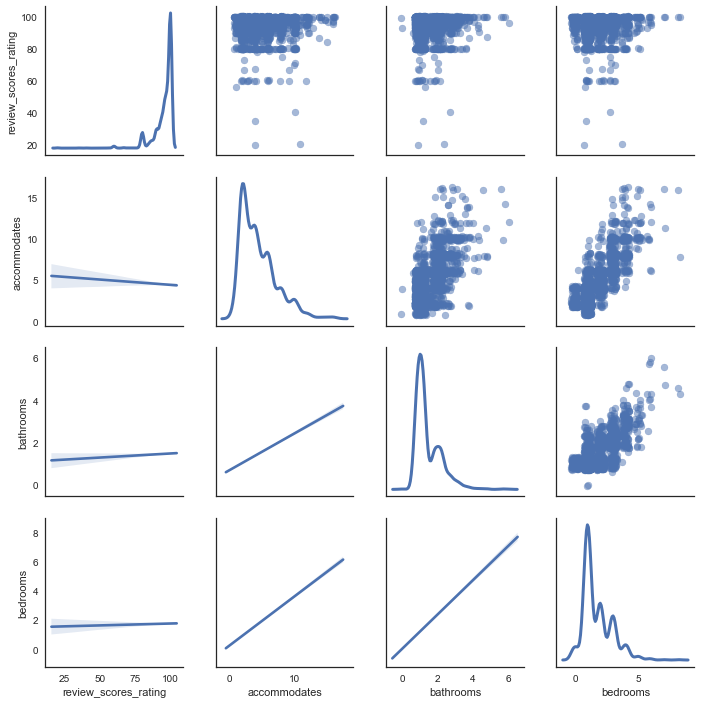

In [10]:
# Bivariate analysis for two continuous variables:
# Improve the aesthetics
sns.set_style("white")

# Import the data
df = pd.read_csv('C:\\Users\\maken\\Fixed_Listings.csv')

# Take a subset of the data to make plots clearer.
df_use = df.loc[
    ((df['property_type'] == 'House') | (df['property_type'] == 'Apartment')),
    ['property_type', 'require_guest_phone_verification', 'review_scores_rating', 'accommodates', 
     'bathrooms', 'bedrooms']]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_use.loc[:, 'review_scores_rating' : 'bedrooms'].dropna()
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size =(df_jittered.shape)),
    columns = df_jittered.columns
                      )

# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

C:\Users\maken\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maken\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


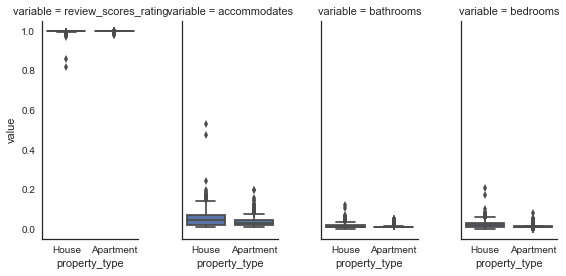

count    3482.000000
mean        0.997989
std         0.004631
min         0.814463
25%         0.997559
50%         0.998961
75%         0.999646
max         0.999898
Name: review_scores_rating, dtype: float64
Ttest_indResult(statistic=4.3408619102843957, pvalue=1.4593773004949049e-05)
count    3482.000000
mean        0.047300
std         0.031079
min         0.009995
25%         0.021269
50%         0.039966
75%         0.061069
max         0.529401
Name: accommodates, dtype: float64
Ttest_indResult(statistic=21.512669019996274, pvalue=1.4603219596793952e-98)
count    3482.000000
mean        0.015333
std         0.007984
min         0.000000
25%         0.010095
50%         0.010775
75%         0.019967
max         0.122169
Name: bathrooms, dtype: float64
Ttest_indResult(statistic=22.255015033277331, pvalue=5.086196565917027e-105)
count    3482.000000
mean        0.018368
std         0.012513
min         0.000000
25%         0.010098
50%         0.011481
75%         0.023191
max     

In [11]:
# Bivariate Analysis for a Continuous and Categorical Pair:

# Plot all variables with boxplots for each property type.
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_box = df_use.dropna()
col = ['review_scores_rating', 'accommodates', 
                            'bathrooms', 'bedrooms', 'property_type']
df_box_normalized = df_box[col]
# Remove the property type from the list, since it cannot be normalized
col.pop() # Since property type was the last in the list, no need for anything in parentheses
df_box_normalized[col] = normalize(df_box[col], norm = 'l2')
# print(df_box_normalized)
df_box_melt = pd.melt(df_box_normalized, id_vars = ['property_type'])
# print(df_box_normalized)


g = sns.FacetGrid(df_box_melt, col='variable', size = 4, aspect = .5)
g = g.map(sns.boxplot, 'property_type', 'value')
plt.show()

# Descriptive statistics by group.
#print(df.groupby('property_type').describe())

# Test whether group differences are signficant.
for col in df_box_normalized.loc[:,'review_scores_rating':'property_type'].columns:
    print(df_box_normalized[col].describe())
    if not col == 'property_type':
        print(stats.ttest_ind(
            df_use[df_use['property_type'] == 'House'][col].dropna(),
            df_use[df_use['property_type'] == 'Apartment'][col].dropna()
    ))

In [14]:
# Create a feature for property type = Apartment and property type = House
features = df[['review_scores_rating', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 
               'require_guest_profile_picture', 'require_guest_phone_verification']]

features['IsApartment'] = np.where(df['property_type'] == 'Apartment', 1, 0)
features['accommodates_less_three'] = df['accommodates'] < 3
features['no_bathroom'] = df['bathrooms'] == 0
features['bathrooms_one'] = df['bathrooms'] == 1
features['bathrooms_two_plus'] = df['bathrooms'] >= 2
features['no_bedrooms'] = df['bedrooms'] == 0
features['bedrooms_one'] = np.where(df['bedrooms'] == 1, 1, 0)
features['bedrooms_two_plus'] = np.where(df['bedrooms'] >= 2, 1, 0)
features['require_guest_picture'] = df['require_guest_profile_picture'] == 't'
features['require_guest_phone'] = df['require_guest_phone_verification'] == 't'

C:\Users\maken\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maken\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maken\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\make

In [21]:
# Find the correlation of each of the features to review_scores_rating
corr = features.corr()['review_scores_rating']
corr.sort_values()

IsApartment               -0.074651
bedrooms_one              -0.042524
bathrooms_one             -0.038668
accommodates              -0.003630
no_bathroom                0.007541
accommodates_less_three    0.008076
no_bedrooms                0.020060
bedrooms                   0.025328
bedrooms_two_plus          0.033367
require_guest_picture      0.034374
bathrooms_two_plus         0.038366
require_guest_phone        0.045276
bathrooms                  0.046622
review_scores_rating       1.000000
Name: review_scores_rating, dtype: float64

Since 'bathrooms' has the highest correlation, and having one bathroom has a negative effect on review_scores_rating, it's clear that the number of bathrooms being more than one is one of the greatest contributing factors of our features for a greater review score. 

Since IsApartment negatively affects the review_score_rating, it's clear that the 'House' property type provides the better review score. 

The top five contributors to the review score are having multiple bathrooms, require_guest_phone, bathrooms_two_plus, require_guest_picture, and bedrooms_two_plus.